# **Impact of Increase in Epoch on the Network.**

In [2]:
import numpy as np # For matrix math
import matplotlib.pyplot as plt # For plotting
import sys # For printing

In [9]:
# The training data.
X = np.array([
    [0, 1],
    [1, 0],
    [1, 1],
    [0, 0]
])

# The labels for the training data.
y = np.array([
    [1],
    [1],
    [0],
    [0]
])

num_i_units = 2 # Number of Input units
num_h_units = 2 # Number of Hidden units
# num_h_units = 0 # Number of Hidden units
num_o_units = 1 # Number of Output units
# The learning rate for Gradient Descent.
learning_rate = 0.5
# The parameter to help with overfitting.
reg_param = 0
# Maximum iterations for Gradient Descent.
max_iter = 1000
# Number of training examples
m = 4
np.random.seed(10)
W1 = np.random.random((num_h_units,num_i_units )) #W1 to W9
W2 = np.random.random((num_o_units,num_h_units)) #W10 to W12

# W1 = np.random.no( (num_h_units, num_i_units)) # 2x2
# W2 = np.random.normal(0, 1, (num_o_units, num_h_units)) # 1x2
B1 = np.random.random((num_h_units, 1)) # 2x1
B2 = np.random.random((num_o_units, 1)) # 1x1

In [10]:
def sigmoid(z, derv=False):
    if derv: return z * (1 - z)
    return 1 / (1 + np.exp(-z))

def forward(x, predict=False):
    a1 = x.reshape(x.shape[0], 1) # Getting the training example as a column vector.

    z2 = W1.dot(a1) + B1 # 2x2 * 2x1 + 2x1 = 2x1
    a2 = sigmoid(z2) # 2x1

    z3 = W2.dot(a2) + B2 # 1x2 * 2x1 + 1x1 = 1x1
    a3 = sigmoid(z3)

    if predict: return a3
    return (a1, a2, a3)

In [11]:
dW1 = 0 # Gradient for W1
dW2 = 0 # Gradient for W2

dB1 = 0 # Gradient for B1
dB2 = 0 # Gradient for B2

cost = np.zeros((max_iter, 1)) # Column vector to record the cost of the NN after ea

In [12]:
def train(_W1, _W2, _B1, _B2): # The arguments are to bypass UnboundLocalError error
    for i in range(max_iter):
        c = 0
        
        dW1 = 0
        dW2 = 0

        dB1 = 0
        dB2 = 0
        
        for j in range(m):
            sys.stdout.write("\rIteration: {} and {}".format(i + 1, j + 1))

            # Forward Prop.
            a0 = X[j].reshape(X[j].shape[0], 1) # 2x1

            z1 = _W1.dot(a0) + _B1 # 2x2 * 2x1 + 2x1 = 2x1
            a1 = sigmoid(z1) # 2x1

            z2 = _W2.dot(a1) + _B2 # 1x2 * 2x1 + 1x1 = 1x1
            a2 = sigmoid(z2) # 1x1

            # Back prop.
            dz2 = a2 - y[j] # 1x1
            dW2 += dz2 * a1.T # 1x1 .* 1x2 = 1x2

            dz1 = np.multiply((_W2.T * dz2), sigmoid(a1, derv=True)) # (2x1 * 1x1) .* 2x1 = 2x1
            dW1 += dz1.dot(a0.T) # 2x1 * 1x2 = 2x2

            dB1 += dz1 # 2x1
            dB2 += dz2 # 1x1

            c = c + (-(y[j] * np.log(a2)) - ((1 - y[j]) * np.log(1 - a2)))
            sys.stdout.flush() # Updating the text.
        
        _W1 = _W1 - learning_rate * (dW1 / m) + ( (reg_param / m) * _W1)
        _W2 = _W2 - learning_rate * (dW2 / m) + ( (reg_param / m) * _W2)

        _B1 = _B1 - learning_rate * (dB1 / m)
        _B2 = _B2 - learning_rate * (dB2 / m)
        cost[i] = (c / m) + ( 
            (reg_param / (2 * m)) * 
            (
                np.sum(np.power(_W1, 2)) + 
                np.sum(np.power(_W2, 2))
            )
        )
    return (_W1, _W2, _B1, _B2)


In [13]:
W1, W2, B1, B2 = train(W1, W2, B1, B2)

Iteration: 1000 and 4

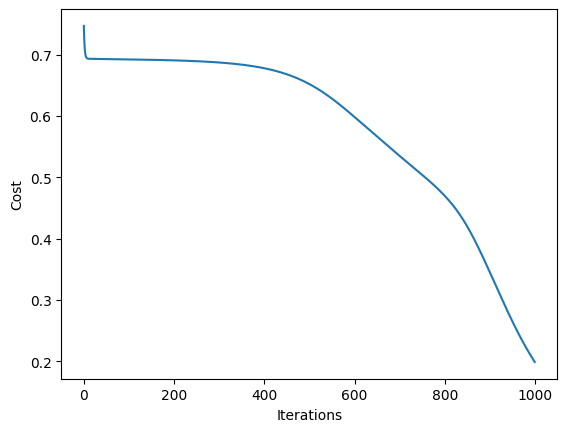

In [14]:
plt.plot(range(max_iter), cost)

# Labelling the x axis as the iterations axis.
plt.xlabel("Iterations")

# Labelling the y axis as the cost axis.
plt.ylabel("Cost")

# Showing the plot.
plt.show()

# **Epoch=10000**

Iteration: 10000 and 4minimum cost function value- [0.00215038]


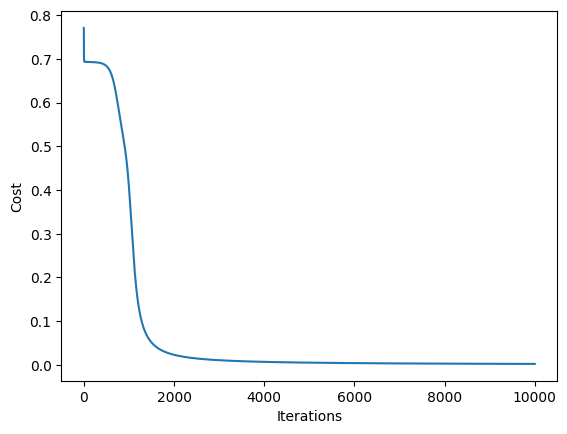

In [17]:
learning_rate = 0.5
num_h_units = 2 # Number of Hidden units
np.random.seed(2)
W1 = np.random.random((num_h_units,num_i_units )) #W1 to W9
W2 = np.random.random((num_o_units,num_h_units)) #W10 to W12
B1 = np.random.random((num_h_units, 1)) # 2x1
B2 = np.random.random((num_o_units, 1)) # 1x1
max_iter = 10000
cost = np.zeros((max_iter, 1)) # Column vector to record the cost of the NN after ea
W1, W2, B1, B2 = train(W1, W2, B1, B2)
print("minimum cost function value-",min(cost))
plt.plot(range(max_iter), cost)

# Labelling the x axis as the iterations axis.
plt.xlabel("Iterations")

# Labelling the y axis as the cost axis.
plt.ylabel("Cost")

# Showing the plot.
plt.show()

# **Epoch=30000**

Iteration: 30000 and 4minimum cost function value- [0.00064606]


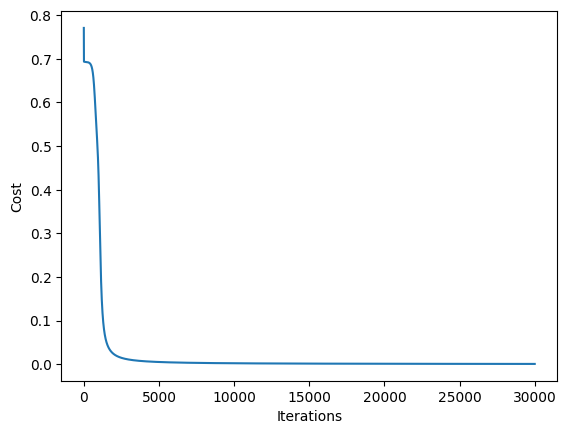

In [18]:
learning_rate = 0.5
num_h_units = 2 # Number of Hidden units
np.random.seed(2)
W1 = np.random.random((num_h_units,num_i_units )) #W1 to W9
W2 = np.random.random((num_o_units,num_h_units)) #W10 to W12
B1 = np.random.random((num_h_units, 1)) # 2x1
B2 = np.random.random((num_o_units, 1)) # 1x1
max_iter = 30000
cost = np.zeros((max_iter, 1)) # Column vector to record the cost of the NN after ea
W1, W2, B1, B2 = train(W1, W2, B1, B2)
print("minimum cost function value-",min(cost))
plt.plot(range(max_iter), cost)

# Labelling the x axis as the iterations axis.
plt.xlabel("Iterations")

# Labelling the y axis as the cost axis.
plt.ylabel("Cost")

# Showing the plot.
plt.show()

# **Explanation of Increase in the epoch!**
Increasing epochs makes sense only if you have a lot of data in your dataset However, your model will eventually reach a point where increasing epochs will not improve accuracy. At this point, you should consider playing around with your model's learning rate